## Normalizer works well: 

In [9]:
10**(SNRs/SNRn/10)

1.0208084865165703

SNRn = 0.06324555320336758, SNRs = 0.00565685424949238, SNRlin = 1.0


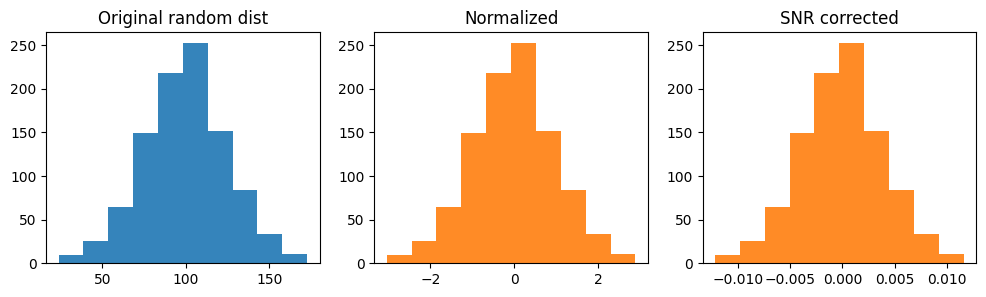

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def normalizer(array):
    return (array - array.mean(axis=0)) / array.std(axis=0)

SNR_dB = 0
fs = 1000
Nfft = int(fs / 2)  # number of FFT points per window    
SNR_linear = 10**(SNR_dB / 10)  # Convert SNR from dB to linear scale
sigma_n = 2/Nfft;
# Constante a ser multiplicada ao ruido e ao sinal para configurar a relação sinal ruido desejada
SNRs = np.sqrt(4*sigma_n*SNR_linear/Nfft);
SNRn = np.sqrt(sigma_n);

M = 50

print(f"SNRn = {SNRn}, SNRs = {SNRs}, SNRlin = {SNR_linear}")
dist =np.random.randn(1000//2, M, 1)
dist = 25*np.random.randn(1000,1) + 100
 # Hist H0 e H1
plt.figure(3, figsize=(12,3))
plt.subplot(131)
# plt.hist(dist[fo,:], color='tab:blue', alpha = 0.9)
plt.hist(dist, color='tab:blue', alpha = 0.9)
plt.title('Original random dist')

plt.subplot(132)
# plt.hist(normalizer(dist[fo,:]), color = 'tab:orange', alpha = 0.9)
plt.hist(normalizer(dist), color='tab:orange', alpha = 0.9)
plt.title('Normalized')

plt.subplot(133)
# plt.hist(normalizer(dist[fo,:]), color = 'tab:orange', alpha = 0.9)
plt.hist(sigma_n*normalizer(dist), color='tab:orange', alpha = 0.9)
plt.title('SNR corrected')
plt.show()